In [1]:
%pdb

Automatic pdb calling has been turned ON


# State-space analysis demonstration

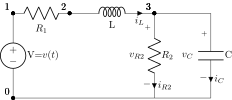

In [2]:
from lcapy import Circuit
cct = Circuit(netlist=
"""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right
""")
cct.draw(svg=True)

### Create state-space model

In [3]:
ss=cct.ss

### State-variable vector

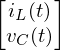

In [4]:
ss.x

### Independent source vector

In [5]:
ss.u

### Output vector for node voltages

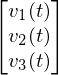

In [6]:
ss.y

### State-space state equations

In [7]:
ss.state_equations()

⎡d         ⎤   ⎡R₁   -1  ⎤                      
⎢──(i_L(t))⎥   ⎢──   ─── ⎥            ⎡1⎤       
⎢dt        ⎥   ⎢L     L  ⎥ ⎡i_L(t)⎤   ⎢─⎥       
⎢          ⎥ = ⎢         ⎥⋅⎢      ⎥ + ⎢L⎥⋅[v(t)]
⎢d         ⎥   ⎢-1   -1  ⎥ ⎣v_C(t)⎦   ⎢ ⎥       
⎢──(v_C(t))⎥   ⎢───  ────⎥            ⎣0⎦       
⎣dt        ⎦   ⎣ C   C⋅R₂⎦                      

### State-space output equations for the node voltages

In [8]:
ss.output_equations()

⎡v₁(t)⎤   ⎡0   0⎤            ⎡1⎤       
⎢     ⎥   ⎢     ⎥ ⎡i_L(t)⎤   ⎢ ⎥       
⎢v₂(t)⎥ = ⎢R₁  0⎥⋅⎢      ⎥ + ⎢1⎥⋅[v(t)]
⎢     ⎥   ⎢     ⎥ ⎣v_C(t)⎦   ⎢ ⎥       
⎣v₃(t)⎦   ⎣0   1⎦            ⎣0⎦       

### Characteristic (system) polynomial

In [9]:
ss.P

 2   s⋅(-C⋅R₁⋅R₂ + L)   -R₁ - R₂
s  + ──────────────── + ────────
          C⋅L⋅R₂         C⋅L⋅R₂ 

### Eigenvalues

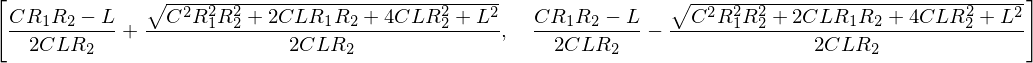

In [10]:
ss.eigenvalues

### Eigenvectors (modal matrix)

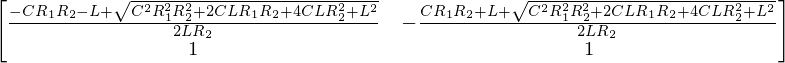

In [11]:
ss.M

### s-domain state transition matrix

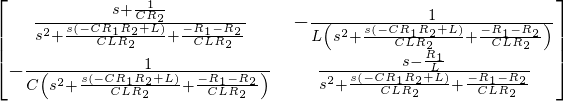

In [12]:
ss.Phi

### System transfer functions

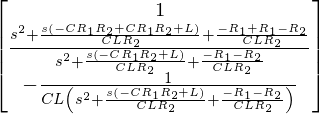

In [13]:
ss.G